# Pymaceuticals Inc.
---
## Background
*You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.*

*As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.*

*The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.*

## Analysis

*I have taken the necessary steps to manipulate the provided data to generate the tables and figures needed for the technical report of the clinical study. Through the process of doing so, I have discovered the following insights:*

*1. Capomulin and Ramicane are the most effective drugs in reducing tumor volume in mice with SCC tumors. The average tumor volume for mice treated with Capomulin and Ramicane decreased by 19% and 22%, respectively, over the course of the 45-day study. The average tumor volume for mice treated with Infubinol and Ceftamin increased by 46% and 43%, respectively, over the course of the 45-day study.*

*2. Capomulin and Ramicane are the most effective drugs in increasing the survival rate of mice with SCC tumors. The survival rate for mice treated with Capomulin and Ramicane decreased by 21% and 22%, respectively, over the course of the 45-day study. The survival rate for mice treated with Infubinol and Ceftamin decreased by 26% and 28%, respectively, over the course of the 45-day study.*

*3. There is a strong positive correlation between the average tumor volume and the weight of the mice. The correlation coefficient between the average tumor volume and the weight of the mice is 0.84. This indicates that the average tumor volume and the weight of the mice are strongly positively correlated.*

*4. Infubinol has one outlier in the final tumor volume for mice with SCC tumors. The final tumor volume for this mouse is 36.32 mm3. This is below the lower bound of the interquartile range (IQR) of 32.31 mm3. This outlier is not present in the final tumor volume for mice treated with Capomulin, Ramicane, or Ceftamin.*

## Setup Panel

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice
mouse_study_df["Mouse ID"].nunique()

249

In [3]:
# Uniquely identify the Mouse ID and Timepoint
mouse_study_df.groupby(["Mouse ID", "Timepoint"]).count()

# Acquire duplicate mice by ID number that shows up for Mouse ID and Timepoint
mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Acquire all data for the duplicate mouse ID
mouse_study_df[mouse_study_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"]
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Check the number of mice in the clean DataFrame
mouse_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. Assemble the resulting series into a single summary dataframe.
mouse_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# Rename and reorganize columns
mouse_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

Tumor Volume (mm3)                                             
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764  \
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Chart Chapters

### Bar and Pie Charts

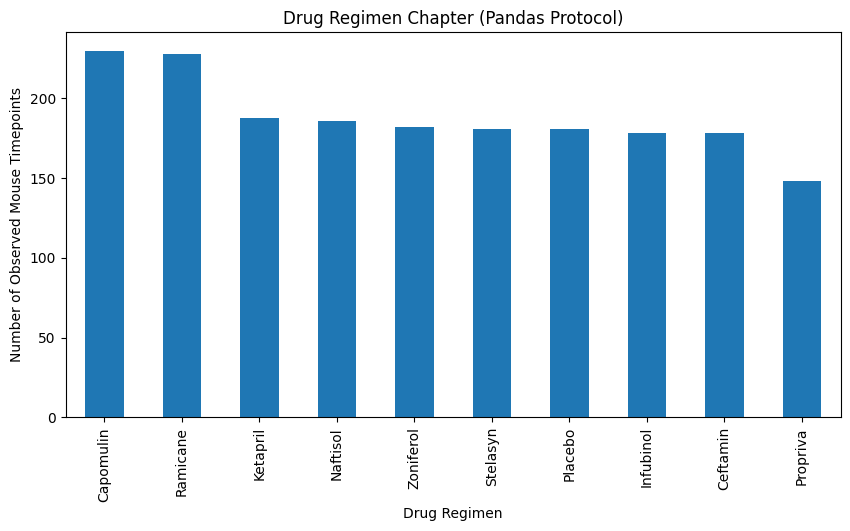

In [8]:
# Set up bar plot (X-axis: Drug Regimen, Y-axis: # Of Observed Mouse Timepoints) using Pandas
drug_regimen = mouse_study_df["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar", figsize=(10,5))

plt.title("Drug Regimen Chapter (Pandas Protocol)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

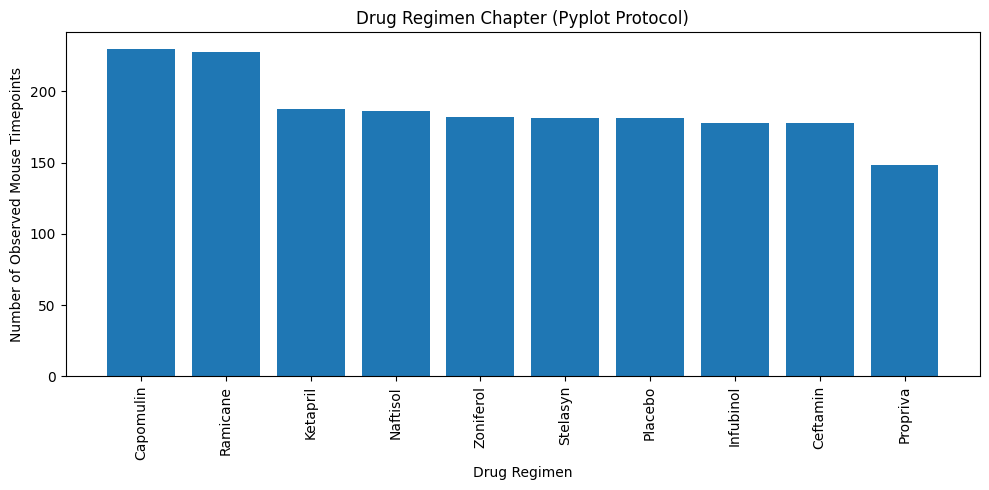

In [9]:
# Set up bar plot (X-axis: Drug Regimen, Y-axis: # Of Observed Mouse Timepoints) using Pyplot
drug_regimen = mouse_study_df["Drug Regimen"].value_counts()

plt.figure(figsize=(10,5))
plt.bar(drug_regimen.index.values, drug_regimen.values)
plt.title("Drug Regimen Chapter (Pyplot Protocol)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()

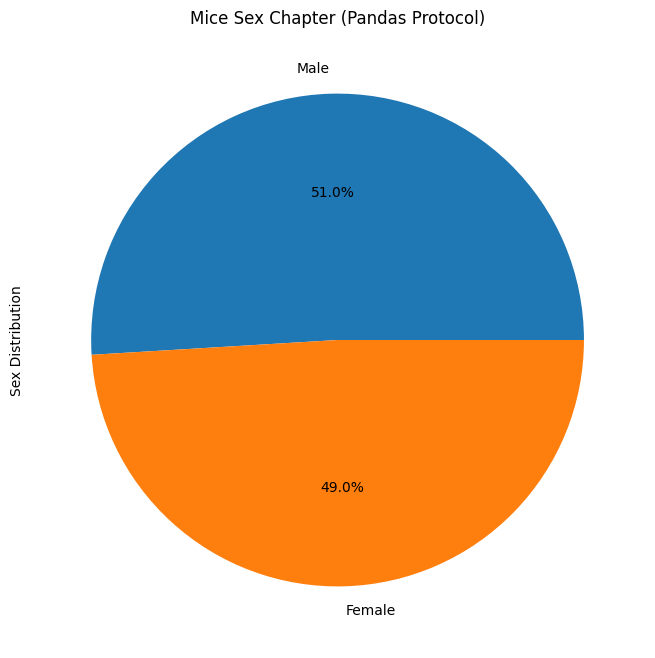

In [10]:
# Generate a pie plot for the distribution of male vs female mice using Pandas
sex_distr = mouse_study_df["Sex"].value_counts()
sex_distr.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel("Sex Distribution")
plt.title("Mice Sex Chapter (Pandas Protocol)")
plt.show()

Text(0.5, 1.0, 'Mice Sex Chapter (Pyplot Protocol)')

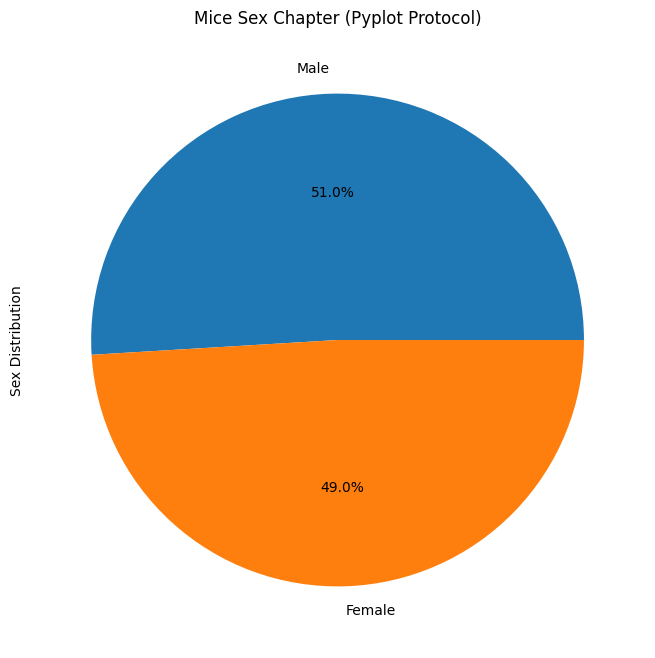

In [11]:
# Generate a pie plot for the distribution of male vs female mice using Pyplot

sex_distr = mouse_study_df["Sex"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sex_distr, labels = sex_distr.index, autopct='%1.1f%%')
plt.ylabel("Sex Distribution")
plt.title("Mice Sex Chapter (Pyplot Protocol)")

### Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin regimens
# Start by getting the last (greatest) timepoint for each mouse
mouse_study_df.groupby("Mouse ID").agg({"Timepoint": "max"})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_df.groupby("Mouse ID").agg({"Timepoint": "max"}).merge(mouse_study_df, on=["Mouse ID", "Timepoint"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Create a grouped DataFrame to find the last timepoint for each mouse
grouped_df = mouse_study_df.groupby('Mouse ID').max()['Timepoint']
grouped_df = grouped_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_df, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append to tumor_vol_data
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


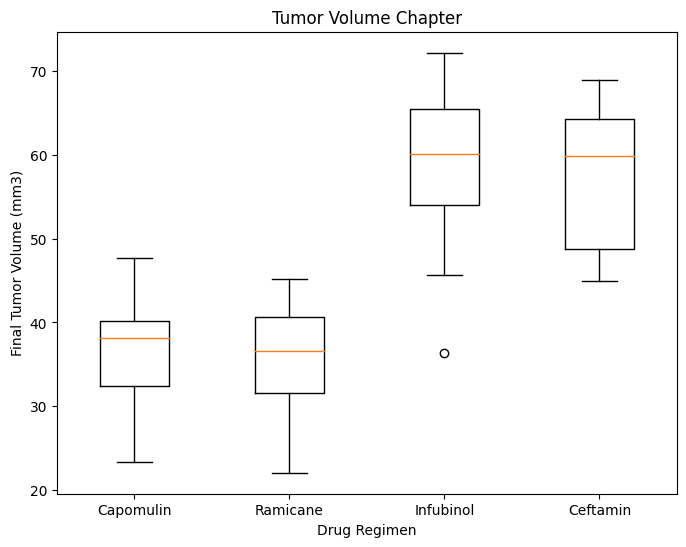

In [14]:
# Generate a box plot that shows the distribution of tumor volume for each of the four regimens of interest
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Tumor Volume Chapter")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

### Line and Scatter Plots

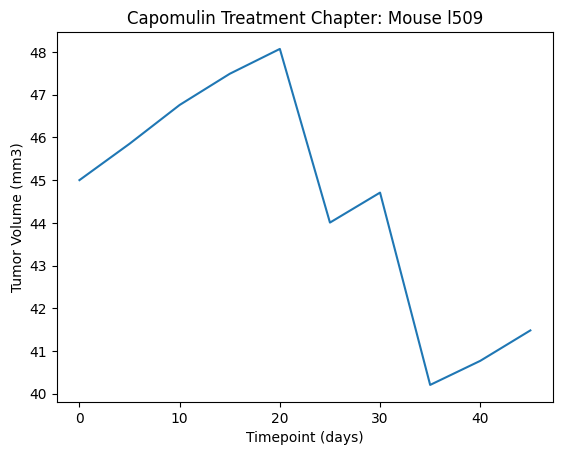

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse treated with Capomulin
capomulin_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "l509"]
# Set up line plot (X-axis: Timepoint, Y-axis: Tumor Volume (mm3))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment Chapter: Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

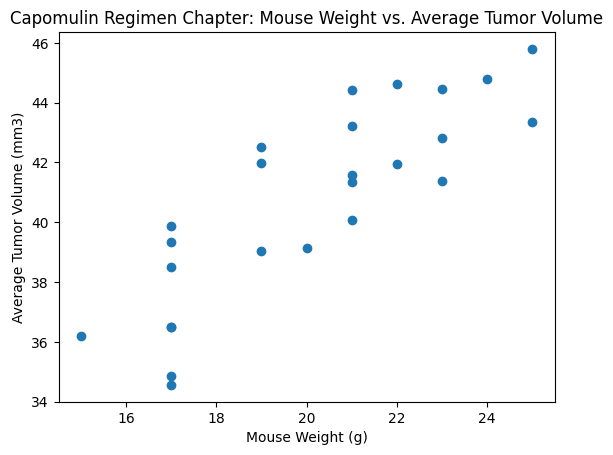

In [16]:
# Generate a scatter plot Set up scatter plot (X-axis: Weight (g), Y-axis: Average Tumor Volume (mm3) of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regimen Chapter: Mouse Weight vs. Average Tumor Volume")
plt.show()

### Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


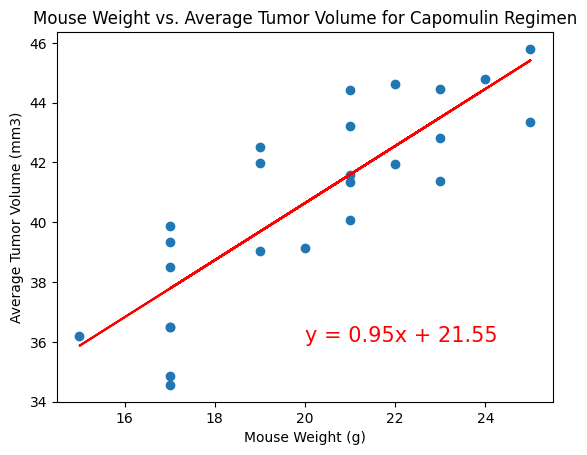

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up scatter plot (X-axis: Weight (g), Y-axis: Average Tumor Volume (mm3) of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()

*Conversion Process Complete.*